In [14]:
from apportionment import *

In [15]:
# for year in constants.years:
#     raw2visualisable(f"1m-{year}.csv", weighted=False, only_electable=False, year=year)
#     raw2visualisable(f"1m-{year}.csv", weighted=False, only_electable=True, year=year)

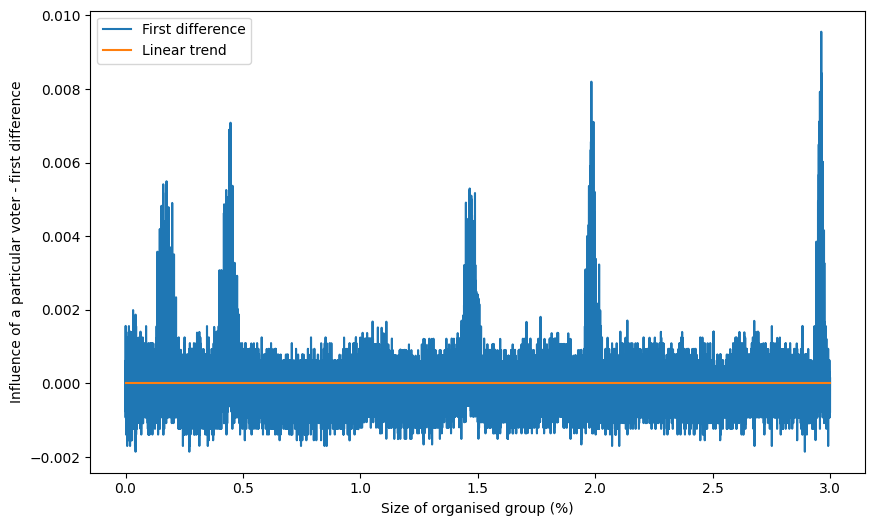

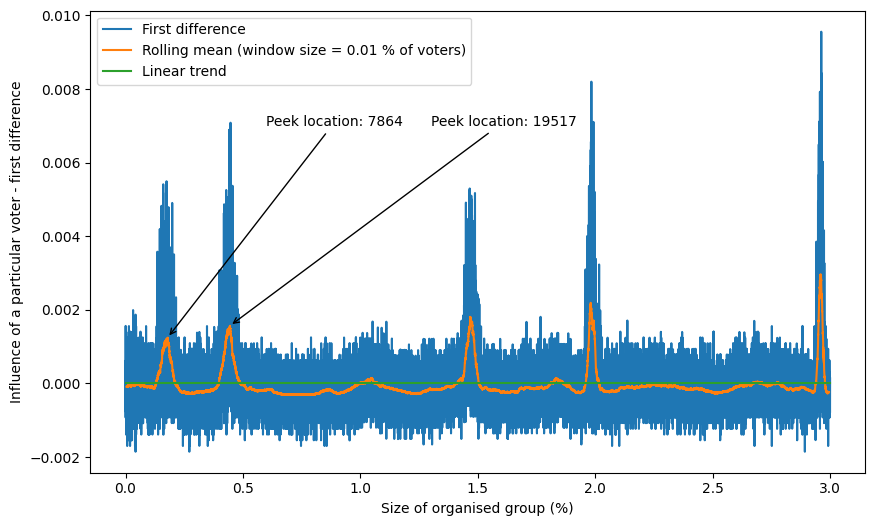

In [27]:
df = pd.read_csv("./vis_data/unweighted-vis-1m-2023.csv")


x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
# plt.title('Influence of a particular voter (2023)')

plt.legend()
plt.show()


plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
# plt.title('Smoothed influence of a particular voter (2023)')

plt.legend()

# max_index = y_rolling[:3000].idxmax()
# plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
#                 xytext=(0.6, 0.007),
#                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# max_index = y_rolling[:5000].idxmax()
# plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
#                 xytext=(1.3, 0.007),
#                 arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.show()




first peek location for 1m: 7785
first peek location for 4,5m: 7818
second peek location for 1m: 19311
second peek location for 4,5m: 19106


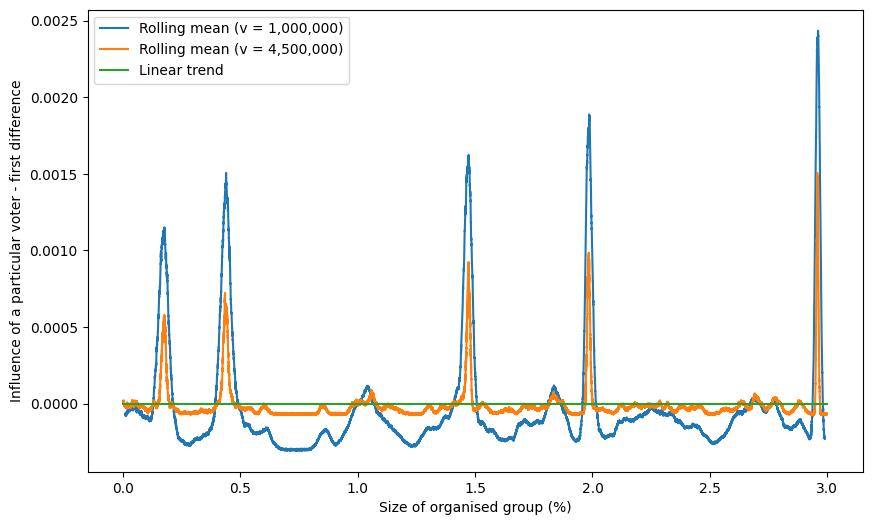

In [33]:
df = pd.read_csv("./vis_data/unweighted-vis-1m-2023.csv")
df2 = pd.read_csv("./vis_data/unweighted-vis-4_5m-2023.csv")

window = 200

x_values = (df['samples'] / 1000000) * 100
x_values2 = (df2['samples'] / 4500000) * 100

y_values = df['diff']
y_values2 = df2['diff']
y_vals =  y_values - (3 * x_values)
y_vals2 =  y_values2 - (3 * x_values2)


y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=window, center=True).mean()

y_deriv2 = y_vals2.diff()
y_rolling2 = y_deriv2.rolling(window=window, center=True).mean()

x = np.arange(0, 4)
y = 3 * x


plt.figure(figsize=(10, 6))

plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (v = 1,000,000)")
plt.plot(x_values2, y_rolling2, '-', markersize=1, label="Rolling mean (v = 4,500,000)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('Size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')

plt.legend()

print(f'first peek location for 1m: { int(y_rolling[:3000].idxmax() * (4388872 / 1000000))}')
print(f'first peek location for 4,5m: { int(y_rolling2[:10000].idxmax() * (4388872 / 4500000))}')

print(f'second peek location for 1m: { int(y_rolling[:5000].idxmax() * (4388872 / 1000000))}')
print(f'second peek location for 4,5m: { int(y_rolling2[:45000].idxmax() * (4388872 / 4500000))}')

plt.show()

In [17]:
df = pd.read_csv("./vis_data/electable-unweighted-vis-1m-2023.csv")

def visualise_and_print(link):
    df = pd.read_csv(link)

    plt.figure(figsize=(10, 6))

    x_values = (df['samples'] / 1000000) * 100
    y_values = df['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    x = np.arange(0, 4)
    y = 3 * x

    plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
    plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")

    plt.plot(x, y * 0, label='Linear trend')

    plt.xlabel('size of organised group (%)')
    plt.ylabel('change of seats - first difference')
    plt.title('Difference of seat distribution function')

    plt.legend()
    plt.show()

    max_index = y_rolling.idxmax()
    print(max_index)

    max_index = y_rolling[:3000].idxmax()
    print(max_index)




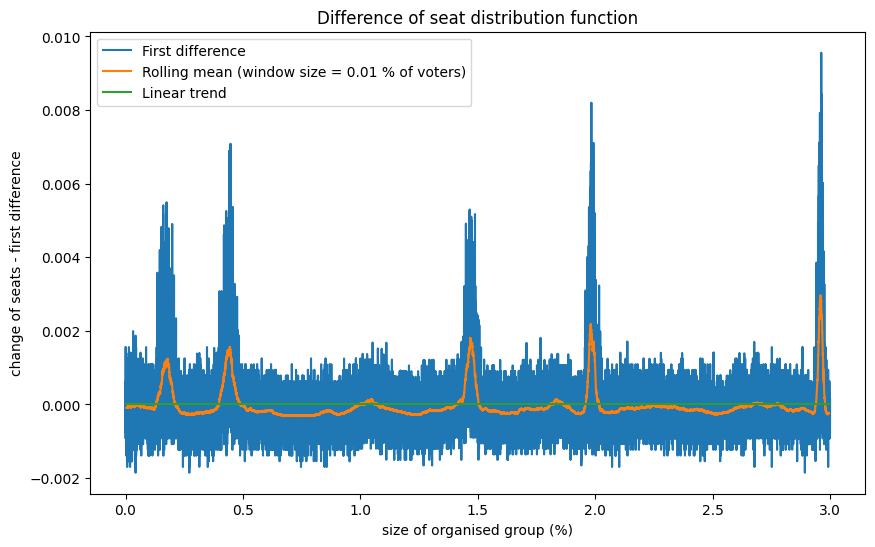

29596
1792


In [18]:
visualise_and_print("./vis_data/unweighted-vis-1m-2023.csv")

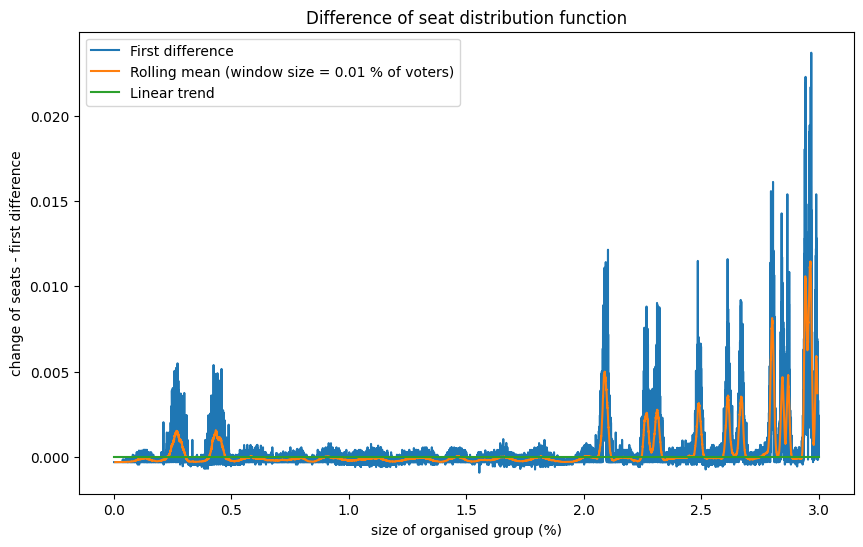

29653
2655


In [19]:
visualise_and_print("./vis_data/unweighted-vis-1m-2012.csv")

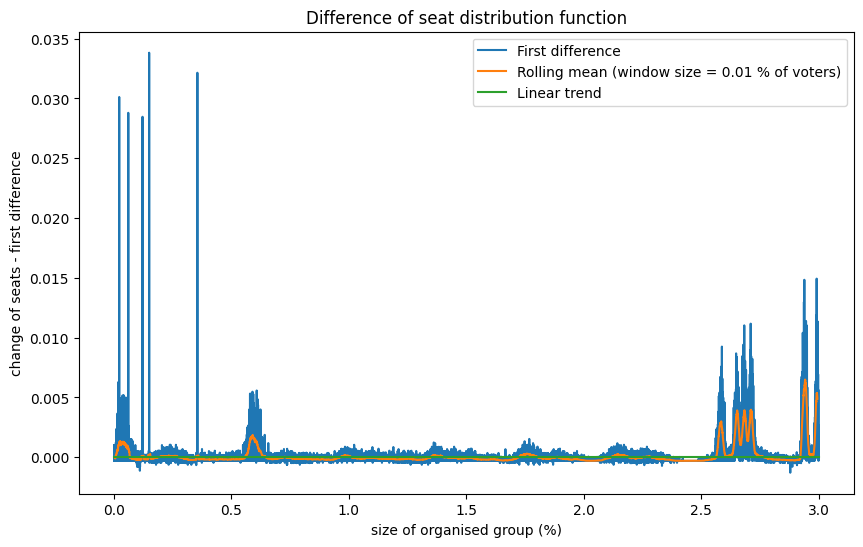

29426
263


In [20]:
visualise_and_print("./vis_data/unweighted-vis-1m-2016.csv")

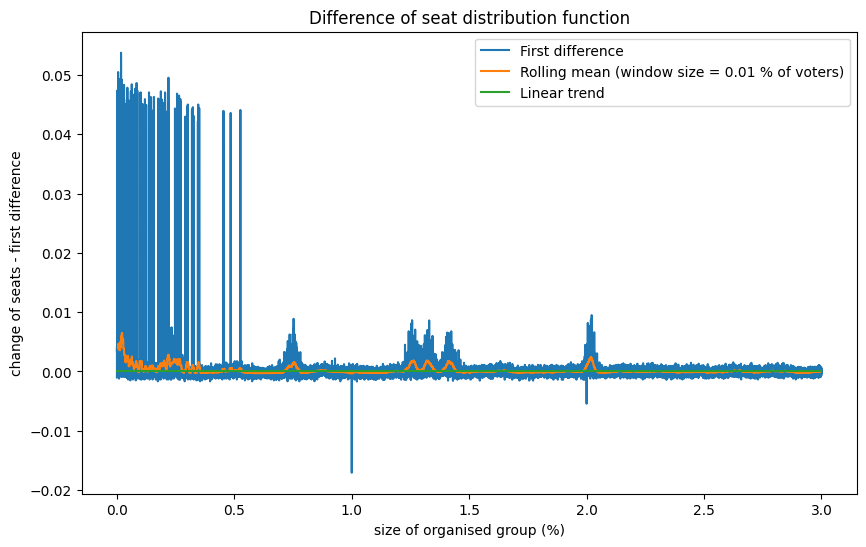

218
218


In [21]:
visualise_and_print("./vis_data/unweighted-vis-1m-2020.csv")